In [ ]:
import pymc3 as pm
import theano.tensor as T
import numpy as np
import arviz as az

In [ ]:
C = np.array([21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35])
ID = np.array(list(range(15)))
Q = 40
ID

In [ ]:
with pm.Model() as Emil: 
    
    # priors 
    zi = pm.Bernoulli("zi", 0.5, shape = len(ID)) # for each participant (shape?)
    ϕ = pm.Uniform("ϕ", lower = 0.5, upper = 1)
    ψ = 0.5
    
    # deterministic?
    θ = pm.Deterministic("θ", T.eq(zi, 1) * ϕ + ψ * T.eq(zi, 0)) #great. 
    
    # likelihood 
    ki = pm.Binomial("ki", p = θ, n = Q, observed = C) #Again: theta for each participant?
    

In [4]:
with Emil: 
    trace_Rønnn = pm.sample(2000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [zi]
>NUTS: [ϕ]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 21 seconds.


array([[<AxesSubplot:title={'center':'zi'}>,
        <AxesSubplot:title={'center':'zi'}>],
       [<AxesSubplot:title={'center':'ϕ'}>,
        <AxesSubplot:title={'center':'ϕ'}>],
       [<AxesSubplot:title={'center':'θ'}>,
        <AxesSubplot:title={'center':'θ'}>]], dtype=object)

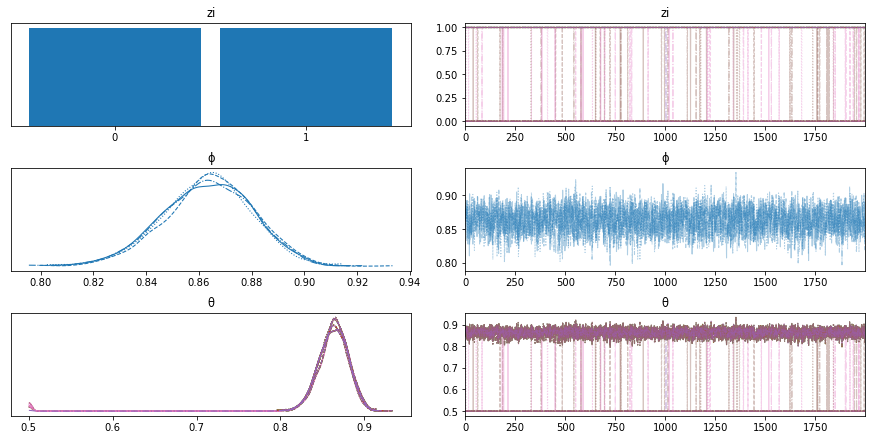

In [5]:
az.plot_trace(trace_Rønnn)

In [6]:
az.summary(trace_Rønnn)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
zi[0],0.000,0.000,0.000,0.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[1],0.000,0.000,0.000,0.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[2],0.000,0.000,0.000,0.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[3],0.000,0.000,0.000,0.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[4],0.000,0.000,0.000,0.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[5],0.992,0.088,1.000,1.000,0.001,0.001,5448.0,5448.0,5448.0,8000.0,1.0
zi[6],0.992,0.087,1.000,1.000,0.001,0.001,4346.0,4346.0,4346.0,8000.0,1.0
zi[7],1.000,0.000,1.000,1.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[8],1.000,0.000,1.000,1.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[9],1.000,0.000,1.000,1.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
